
K-Means Customer Segmentation Analysis


In [ ]:
#1 Importing the librariesimport numpy as np

In [2]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


1. อ่านไฟล์

In [5]:
df = pd.read_csv('Mall_Customers.csv')


2. แสดงผล 10 บรรทัดแรก

In [6]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


3. หาค่าสถิติพื้นฐาน

In [7]:
df.describe ()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


4. ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ

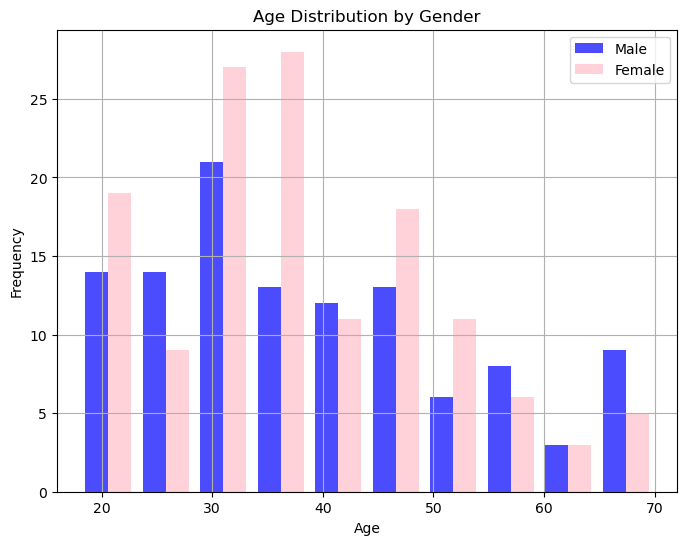

In [15]:
plt.figure(figsize=(8, 6))
plt.hist([df[df['Gender'] == 'Male']['Age'], df[df['Gender'] == 'Female']['Age']], 
         bins=10, alpha=0.7, color=['blue', 'pink'], label=['Male', 'Female'])
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

5. สร้าง histogram ของอายุ แบ่งเป็น 10 bin

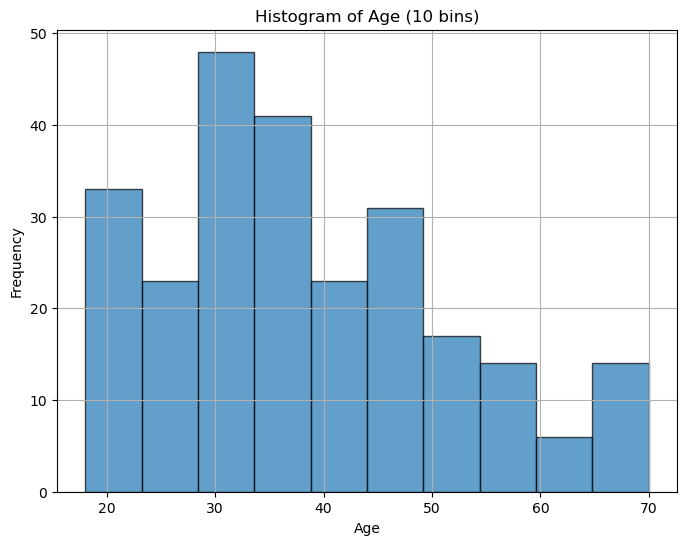

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age (10 bins)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

6.ทำ scatter plot ของข้อมูล Age, Income 

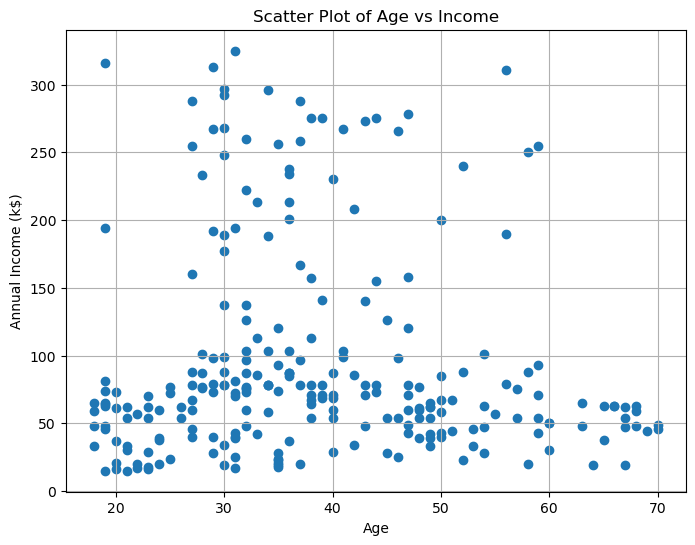

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True)
plt.show()

7.พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering

In [13]:
from sklearn import preprocessing

#creating labelEncoder
number = preprocessing.LabelEncoder()
df['Gender'] = number.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [49]:
df = df[['Age','Annual Income (k$)']]

In [50]:
df

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,64,19
9,30,19


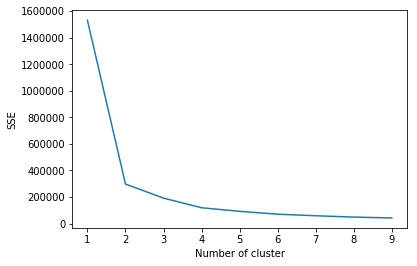

In [51]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

8. ได้ค่า k= 4 ในการจัดกลุ่มโดยวิธี K-Means

In [52]:
k_means = KMeans(n_clusters=4)
k_means.fit(df)
cluster_scale_pred = k_means.fit_predict(df)

ข้อ 9 ทำ scatter plot ที่แสดง centroid

In [53]:
cluster = k_means.predict(df)
cluster_label = k_means.labels_

[[ 40.41111111  37.3       ]
 [ 36.13636364 178.77272727]
 [ 37.69444444  78.52777778]
 [ 37.33333333 270.9       ]]


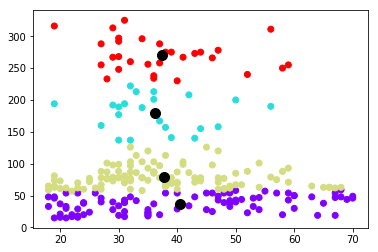

In [40]:
centers

array([[174.5       ,   0.5       ,  36.87878788,  97.95454545,
         51.03030303],
       [104.98630137,   0.43835616,  41.43835616,  62.20547945,
         48.91780822],
       [229.        ,   0.46511628,  36.69767442, 249.02325581,
         51.20930233],
       [ 34.51470588,   0.41176471,  38.02941176,  32.11764706,
         50.29411765]])